# Импорт

In [2]:
import pandas as pd
import numpy as np
from __future__ import division, print_function

import seaborn as sns
%pylab inline

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

Populating the interactive namespace from numpy and matplotlib


## Загрузка & первоначальный анализ

In [3]:
fold = 'C:\Virtual\ibm\\'
purchases = pd.read_csv(fold+'Purchase_Task.csv')

print (purchases.shape)
purchases['TIMESTAMP'] = pd.to_datetime(purchases['TIMESTAMP'])
purchases[:5]

(154110, 5)


,SESSION_ID,COOKIE_ID,TIMESTAMP,PRODUCT_ID,BASE_PRICE
0,3520894568428972544,50191437021527314046259,2015-11-01 05:22:06,537739.0,256.0
1,6746036549903427584,50161372185583302757617,2015-11-01 05:23:29,626315.0,69.0
2,6746036549903427584,50161372185583302757617,2015-11-01 05:23:29,626315.0,69.0
3,3232727606581901824,50031441922087318075606,2015-11-01 05:24:15,506594.0,264.0
4,4630562004574258176,50181423850284296776983,2015-11-01 05:26:53,508138.0,19.0


In [4]:
purchases.describe()

,SESSION_ID,PRODUCT_ID,BASE_PRICE
count,1.541100e+05,154110.000000,154110.000000
mean,4.590869e+18,573920.149679,87.053773
std,2.639453e+18,70732.783799,103.542093
min,2.107022e+14,106710.000000,0.000000
25%,2.338067e+18,536124.000000,15.000000
50%,4.588272e+18,589362.000000,29.000000
75%,6.836535e+18,621564.500000,200.000000
max,9.222999e+18,998881.000000,331.000000


In [5]:
#уникальных продуктов 
print (purchases.PRODUCT_ID.nunique())
#уникальных SESSION_ID
print (purchases.SESSION_ID.nunique())
#уникальных COOKIE_ID
print (purchases.COOKIE_ID.nunique())

11938
66005
62127


# Поиск дублей

In [6]:
#Ищем одинаковые строки по всем столбцам
linit=purchases.columns
purchases[purchases.duplicated(linit,keep=False)].sort_values(by=['SESSION_ID','BASE_PRICE','PRODUCT_ID'])

,SESSION_ID,COOKIE_ID,TIMESTAMP,PRODUCT_ID,BASE_PRICE
710,210702168536172,50241446232790285438882,2015-11-01 14:15:50,267534.0,7.0
712,210702168536172,50241446232790285438882,2015-11-01 14:15:50,267534.0,7.0
711,210702168536172,50241446232790285438882,2015-11-01 14:15:50,801359.0,7.0
714,210702168536172,50241446232790285438882,2015-11-01 14:15:50,801359.0,7.0
709,210702168536172,50241446232790285438882,2015-11-01 14:15:50,590730.0,31.0
713,210702168536172,50241446232790285438882,2015-11-01 14:15:50,590730.0,31.0
12349,563711563367633,30151389349546004393610,2015-11-02 17:07:14,634764.0,19.0
12352,563711563367633,30151389349546004393610,2015-11-02 17:07:14,634764.0,19.0
12350,563711563367633,30151389349546004393610,2015-11-02 17:07:14,626061.0,119.0
12351,563711563367633,30151389349546004393610,2015-11-02 17:07:14,626061.0,119.0


In [7]:
# Общее число строк-дубликотов
print (np.shape(purchases[purchases.duplicated()])[0])

35557


#### Если достоверно известно, что наличие дубликата не несет дополнительной информации, то нижеследующий признак можно не добавлять:

In [8]:
print (np.shape(purchases))
purchases = purchases.groupby(list(purchases.columns)).size().reset_index().rename(columns={0:'REC_COUNT'})
purchases.head(7)

(154110, 5)


,SESSION_ID,COOKIE_ID,TIMESTAMP,PRODUCT_ID,BASE_PRICE,REC_COUNT
0,210702168536172,50241446232790285438882,2015-11-01 14:15:50,267534.0,7.0,2
1,210702168536172,50241446232790285438882,2015-11-01 14:15:50,590730.0,31.0,2
2,210702168536172,50241446232790285438882,2015-11-01 14:15:50,801359.0,7.0,2
3,213154019631725,50171446221820221706383,2015-11-13 02:58:21,617537.0,20.0,1
4,411423193366617,70151375201030286672274,2015-11-10 03:29:11,600318.0,20.0,1
5,411423193366617,70151375201030286672274,2015-11-10 03:29:12,479839.0,18.0,1
6,411423193366617,70151375201030286672274,2015-11-10 03:29:12,581425.0,8.0,1


In [9]:
# видно, что возможно различное число дубликатов
purchases.REC_COUNT.value_counts()

1    83513
2    34781
4      258
3        1
Name: REC_COUNT, dtype: int64

In [10]:
#удаляем дубли
purchases = purchases.drop_duplicates(linit)
print (np.shape(purchases))

(118553, 6)


## Добавляем признаков по TIMESTAMP

In [11]:
print (max(purchases.TIMESTAMP))
print (min(purchases.TIMESTAMP))

2015-11-30 23:59:34
2015-11-01 05:22:06


In [12]:
purchases['day'] = purchases['TIMESTAMP'].dt.day
purchases['dayofweek'] = purchases['TIMESTAMP'].dt.dayofweek
purchases['hour'] = purchases['TIMESTAMP'].dt.hour
purchases['minute'] = purchases['TIMESTAMP'].dt.minute
purchases['second'] = purchases['TIMESTAMP'].dt.second

purchases[:5]

,SESSION_ID,COOKIE_ID,TIMESTAMP,PRODUCT_ID,BASE_PRICE,REC_COUNT,day,dayofweek,hour,minute,second
0,210702168536172,50241446232790285438882,2015-11-01 14:15:50,267534.0,7.0,2,1,6,14,15,50
1,210702168536172,50241446232790285438882,2015-11-01 14:15:50,590730.0,31.0,2,1,6,14,15,50
2,210702168536172,50241446232790285438882,2015-11-01 14:15:50,801359.0,7.0,2,1,6,14,15,50
3,213154019631725,50171446221820221706383,2015-11-13 02:58:21,617537.0,20.0,1,13,4,2,58,21
4,411423193366617,70151375201030286672274,2015-11-10 03:29:11,600318.0,20.0,1,10,1,3,29,11


# Визуализации

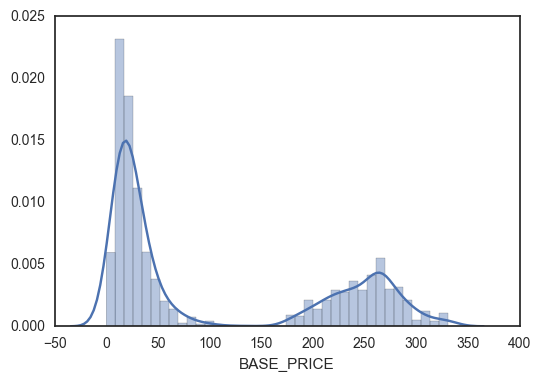

In [24]:
sns.distplot(purchases.BASE_PRICE)

## Распределение покупок по времени

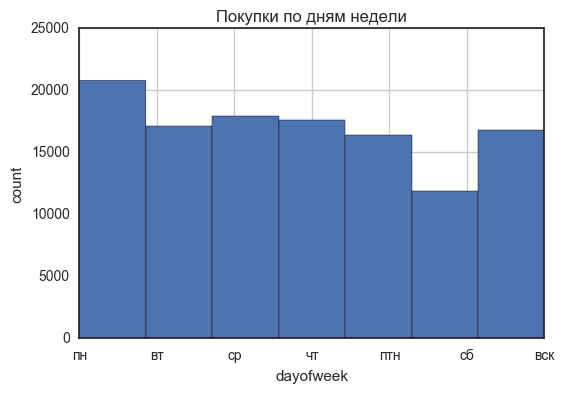

In [25]:
p = purchases.dayofweek.hist(bins=7)
p.set_xlabel('dayofweek')
p.set_ylabel('count')
p.set_xlim([0, 6])
p.set_xticklabels([u'пн', u'вт', u'ср', u'чт', u'птн', u'сб', u'вск'])
p.set_title(u'Покупки по дням недели')

In [26]:
purchases.head(1)

,SESSION_ID,COOKIE_ID,TIMESTAMP,PRODUCT_ID,BASE_PRICE,REC_COUNT,day,dayofweek,hour,minute,second
0,210702168536172,50241446232790285438882,2015-11-01 14:15:50,267534.0,7.0,2,1,6,14,15,50


(0, 60)

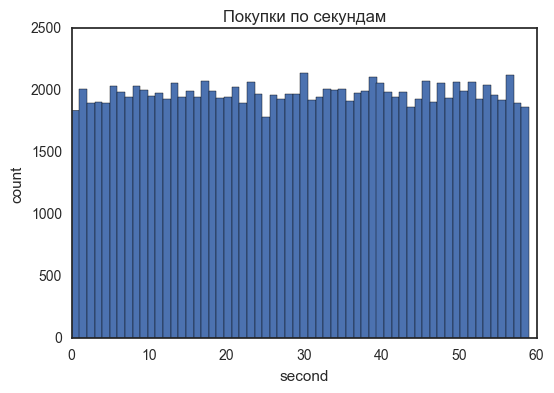

In [27]:
plt.hist(purchases.second.values, bins=60)
plt.xlabel('second')
plt.ylabel('count')
plt.title(u'Покупки по секундам')
plt.xlim([0, 60])

(0, 60)

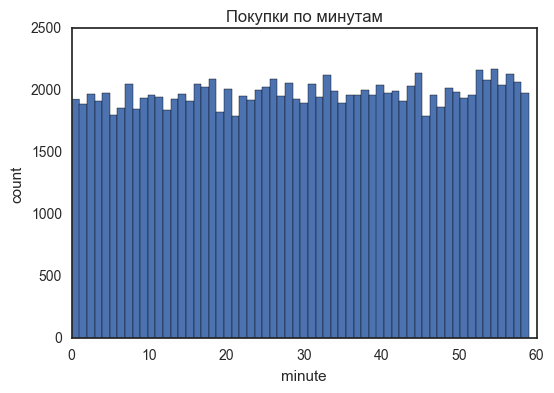

In [28]:
plt.hist(purchases.minute.values, bins=60)
plt.xlabel('minute')
plt.ylabel('count')
plt.title(u'Покупки по минутам')
plt.xlim([0, 60])

(0, 24)

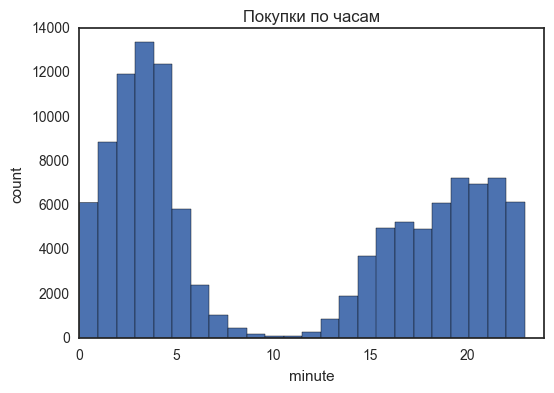

In [29]:
plt.hist(purchases.hour.values, bins=24)
plt.xlabel('minute')
plt.ylabel('count')
plt.title(u'Покупки по часам')
plt.xlim([0, 24])

In [30]:
# число дней
purchases.day.nunique()

30

(0, 30)

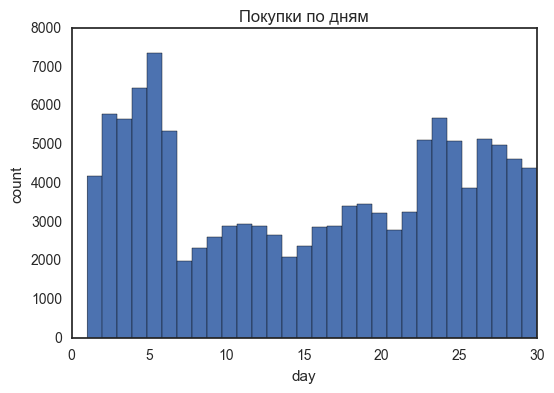

In [31]:
plt.hist(purchases.day.values, bins=30)
plt.xlabel('day')
plt.ylabel('count')
plt.title(u'Покупки по дням')
plt.xlim([0, 30])

## Другие графики

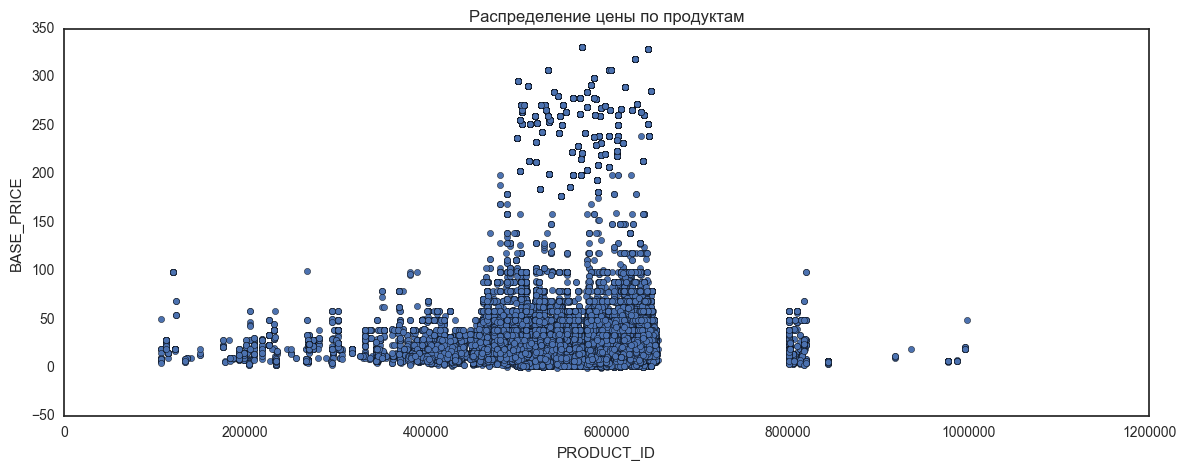

In [32]:
figsize(14, 5) 
purchases[['PRODUCT_ID', 'BASE_PRICE']].plot(kind='scatter', x='PRODUCT_ID', y='BASE_PRICE', title=u'Распределение цены по продуктам')

In [33]:
purchases.head(2)

,SESSION_ID,COOKIE_ID,TIMESTAMP,PRODUCT_ID,BASE_PRICE,REC_COUNT,day,dayofweek,hour,minute,second
0,210702168536172,50241446232790285438882,2015-11-01 14:15:50,267534.0,7.0,2,1,6,14,15,50
1,210702168536172,50241446232790285438882,2015-11-01 14:15:50,590730.0,31.0,2,1,6,14,15,50


# Создаем сводную таблицу

## Группировка по кукам

In [13]:
#число записей по сессии
purchases['COOKIE_ID_COUNT'] = purchases.groupby(['COOKIE_ID'])['COOKIE_ID'].transform('count')
purchases['UNIQUE_SESSION_in_COOKIE_ID'] = purchases.groupby(['COOKIE_ID'])['SESSION_ID'].transform(lambda x: x.nunique())

In [14]:
#time diff в секундах 
purchases['TdiffTotal'] = (purchases.groupby(['COOKIE_ID'])['TIMESTAMP'].transform(max) - \
                     purchases.groupby(['COOKIE_ID'])['TIMESTAMP'].transform(min)).astype('timedelta64[s]')
purchases['temp'] = purchases.groupby('COOKIE_ID')['TIMESTAMP'].diff()
purchases['TdiffMax'] = purchases.groupby('COOKIE_ID')['temp'].transform(max).astype('timedelta64[s]')
purchases['TdiffMin'] = purchases.groupby('COOKIE_ID')['temp'].transform(min).astype('timedelta64[s]')


In [15]:
#число уникальных time
purchases['TUnique'] = purchases.groupby('COOKIE_ID')['temp'].transform(min).astype('timedelta64[s]')   
#число уникальных PRODUCT_ID
purchases['PUnique'] = purchases.groupby(['COOKIE_ID'])['PRODUCT_ID'].transform(lambda x: x.nunique())
#mean BASE_PRICE
purchases['Price_mean'] = purchases.groupby(['COOKIE_ID'])['BASE_PRICE'].transform(mean)
purchases['Price_sum'] = purchases.groupby(['COOKIE_ID'])['BASE_PRICE'].transform(sum)
purchases['Price_median'] = purchases.groupby(['COOKIE_ID'])['BASE_PRICE'].transform(lambda x: x.median())

In [16]:
#sum BASE_PRICE / time diff
purchases['temp'] = purchases.groupby(['COOKIE_ID'])['BASE_PRICE'].transform(sum)
purchases['Price_by_time_diff'] = purchases['temp'] / purchases['TdiffTotal'] 


In [17]:
#число записей / time diff
purchases['COOKIE_ID_COUNT_by_time_diff'] = purchases['COOKIE_ID_COUNT'] / purchases['TdiffTotal'] 
#число кук / time diff
#purchases['UNIQUE_COOKIE_by_time_diff'] = purchases['UNIQUE_COOKIE'] / purchases['TdiffTotal'] 

del purchases['temp']

In [18]:
purchases[(purchases.SESSION_ID == 6526585647633777664) | (purchases.COOKIE_ID=='80161445253327296350684')]

,SESSION_ID,COOKIE_ID,TIMESTAMP,PRODUCT_ID,BASE_PRICE,REC_COUNT,day,dayofweek,hour,minute,second,COOKIE_ID_COUNT,UNIQUE_SESSION_in_COOKIE_ID,TdiffTotal,TdiffMax,TdiffMin,TUnique,PUnique,Price_mean,Price_sum,Price_median,Price_by_time_diff,COOKIE_ID_COUNT_by_time_diff
84802,6526585647633777664,80161445253327296350684,2015-11-03 00:58:06,626685.0,27.0,2,3,1,0,58,6,3,2,244494.0,244494.0,0.0,0.0,2.0,28.333333,85.0,27.0,0.000348,0.000012
84803,6526585647633777664,80161445253327296350684,2015-11-03 00:58:06,636979.0,31.0,2,3,1,0,58,6,3,2,244494.0,244494.0,0.0,0.0,2.0,28.333333,85.0,27.0,0.000348,0.000012
114082,8855788542052372480,80161445253327296350684,2015-11-05 20:53:00,626685.0,27.0,2,5,3,20,53,0,3,2,244494.0,244494.0,0.0,0.0,2.0,28.333333,85.0,27.0,0.000348,0.000012


In [19]:
purchases[(purchases.SESSION_ID == 5351922903166403584)]

,SESSION_ID,COOKIE_ID,TIMESTAMP,PRODUCT_ID,BASE_PRICE,REC_COUNT,day,dayofweek,hour,minute,second,COOKIE_ID_COUNT,UNIQUE_SESSION_in_COOKIE_ID,TdiffTotal,TdiffMax,TdiffMin,TUnique,PUnique,Price_mean,Price_sum,Price_median,Price_by_time_diff,COOKIE_ID_COUNT_by_time_diff
69500,5351922903166403584,80071446336930327086739,2015-11-01 07:52:25,571436.0,216.0,1,1,6,7,52,25,9,1,20784.0,5674.0,477.0,477.0,8.0,251.0,2259.0,269.0,0.108689,0.000433
69501,5351922903166403584,80071446336930327086739,2015-11-01 08:46:44,633482.0,272.0,1,1,6,8,46,44,9,1,20784.0,5674.0,477.0,477.0,8.0,251.0,2259.0,269.0,0.108689,0.000433
69502,5351922903166403584,80071446336930327086739,2015-11-01 09:14:30,562715.0,199.0,1,1,6,9,14,30,9,1,20784.0,5674.0,477.0,477.0,8.0,251.0,2259.0,269.0,0.108689,0.000433
69503,5351922903166403584,80071446336930327086739,2015-11-01 09:56:14,572198.0,331.0,1,1,6,9,56,14,9,1,20784.0,5674.0,477.0,477.0,8.0,251.0,2259.0,269.0,0.108689,0.000433
69504,5351922903166403584,80071446336930327086739,2015-11-01 10:08:00,577958.0,269.0,1,1,6,10,8,0,9,1,20784.0,5674.0,477.0,477.0,8.0,251.0,2259.0,269.0,0.108689,0.000433
69505,5351922903166403584,80071446336930327086739,2015-11-01 11:42:34,512993.0,291.0,1,1,6,11,42,34,9,1,20784.0,5674.0,477.0,477.0,8.0,251.0,2259.0,269.0,0.108689,0.000433
69506,5351922903166403584,80071446336930327086739,2015-11-01 12:53:54,577958.0,269.0,1,1,6,12,53,54,9,1,20784.0,5674.0,477.0,477.0,8.0,251.0,2259.0,269.0,0.108689,0.000433
69507,5351922903166403584,80071446336930327086739,2015-11-01 13:30:52,611396.0,235.0,1,1,6,13,30,52,9,1,20784.0,5674.0,477.0,477.0,8.0,251.0,2259.0,269.0,0.108689,0.000433
69508,5351922903166403584,80071446336930327086739,2015-11-01 13:38:49,549545.0,177.0,1,1,6,13,38,49,9,1,20784.0,5674.0,477.0,477.0,8.0,251.0,2259.0,269.0,0.108689,0.000433


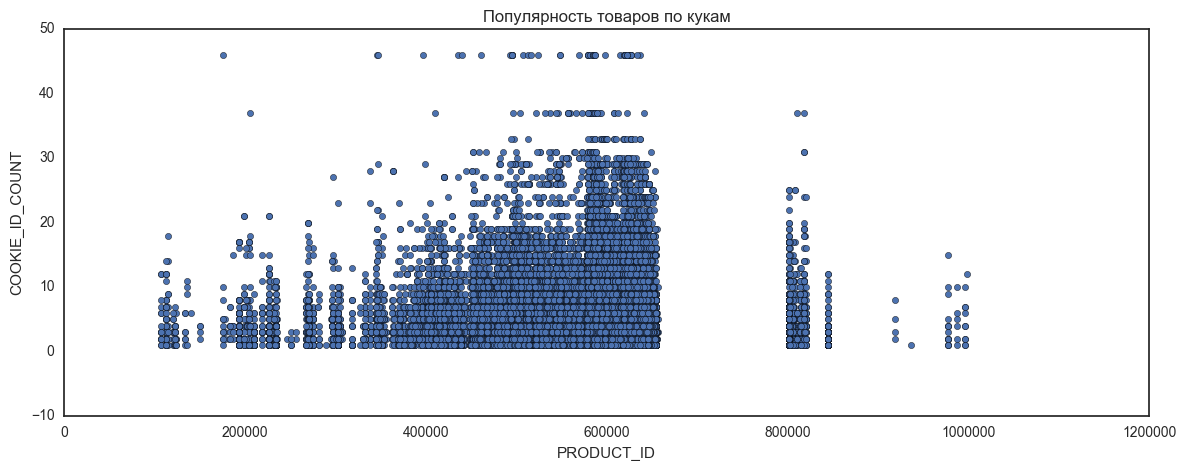

In [20]:
figsize(14, 5) 
purchases[['PRODUCT_ID', 'COOKIE_ID_COUNT']].plot(kind='scatter', x='PRODUCT_ID', y='COOKIE_ID_COUNT', title=u'Популярность товаров по кукам')

# Формируем таблицу параметров уникальных кук

In [22]:
cookies = purchases.drop(['SESSION_ID', 'TIMESTAMP', 'PRODUCT_ID', 'BASE_PRICE', 'day', 'dayofweek','hour','minute','second'],1).\
                    groupby('COOKIE_ID').first()

In [23]:
print (np.shape(cookies))
cookies.describe()

(62127, 13)


,REC_COUNT,COOKIE_ID_COUNT,UNIQUE_SESSION_in_COOKIE_ID,TdiffTotal,TdiffMax,TdiffMin,TUnique,PUnique,Price_mean,Price_sum,Price_median,Price_by_time_diff,COOKIE_ID_COUNT_by_time_diff
count,62127.000000,62127.000000,62127.000000,6.212700e+04,2.300700e+04,2.300700e+04,2.300700e+04,62127.000000,62127.000000,62127.000000,62127.000000,6.212300e+04,6.212700e+04
mean,1.219164,1.908236,1.062421,3.836080e+04,3.923707e+04,-3.797257e+04,-3.797257e+04,1.895617,144.194811,201.686577,142.706030,inf,inf
std,0.423603,1.893079,0.279921,2.257502e+05,3.049942e+05,3.032573e+05,3.032573e+05,1.870024,112.357044,179.827484,113.922459,NaN,NaN
min,1.000000,1.000000,1.000000,0.000000e+00,-2.435173e+06,-2.465049e+06,-2.465049e+06,1.000000,0.000000,0.000000,0.000000,8.822191e-06,8.212969e-07
25%,1.000000,1.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,25.666667,49.000000,24.000000,inf,inf
50%,1.000000,1.000000,1.000000,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000,177.000000,214.000000,182.000000,NaN,NaN
75%,1.000000,2.000000,1.000000,0.000000e+00,1.229000e+03,1.000000e+00,1.000000e+00,2.000000,254.000000,270.000000,254.000000,inf,inf
max,4.000000,46.000000,9.000000,2.484340e+06,2.484339e+06,2.394588e+06,2.394588e+06,45.000000,331.000000,3407.000000,331.000000,inf,inf


## Scatter plot по полученной таблице

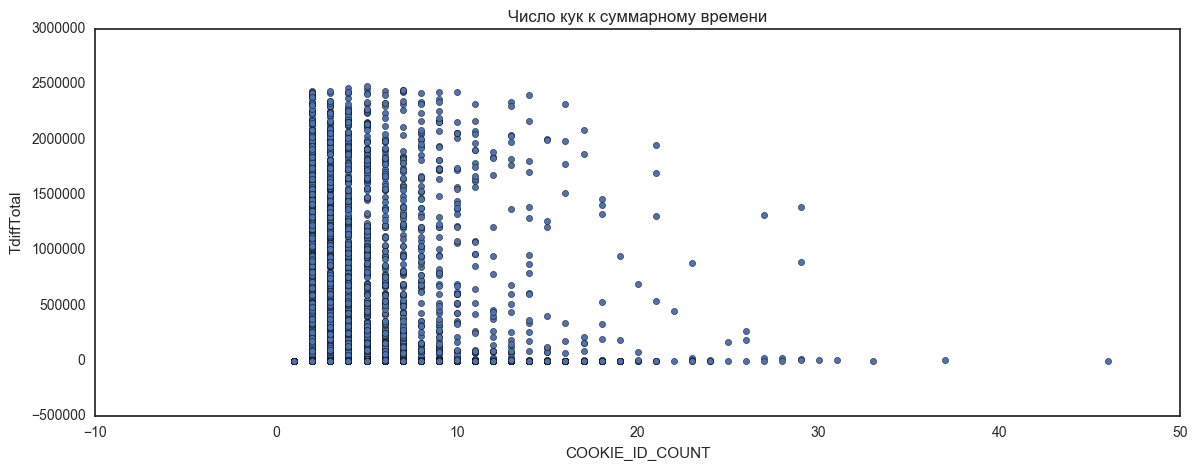

In [24]:
figsize(14, 5) 
cookies[['COOKIE_ID_COUNT', 'TdiffTotal']].plot(kind='scatter', x='COOKIE_ID_COUNT', y='TdiffTotal', title=u'Число кук к суммарному времени')

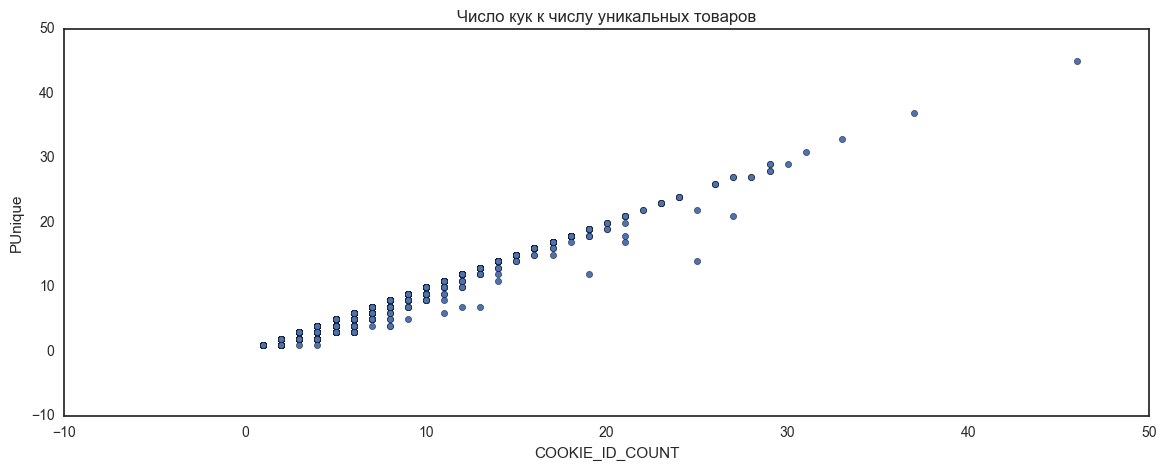

In [25]:
figsize(14, 5)
cookies[['COOKIE_ID_COUNT', 'PUnique']].plot(kind='scatter', x='COOKIE_ID_COUNT', y='PUnique', title=u'Число кук к числу уникальных товаров')

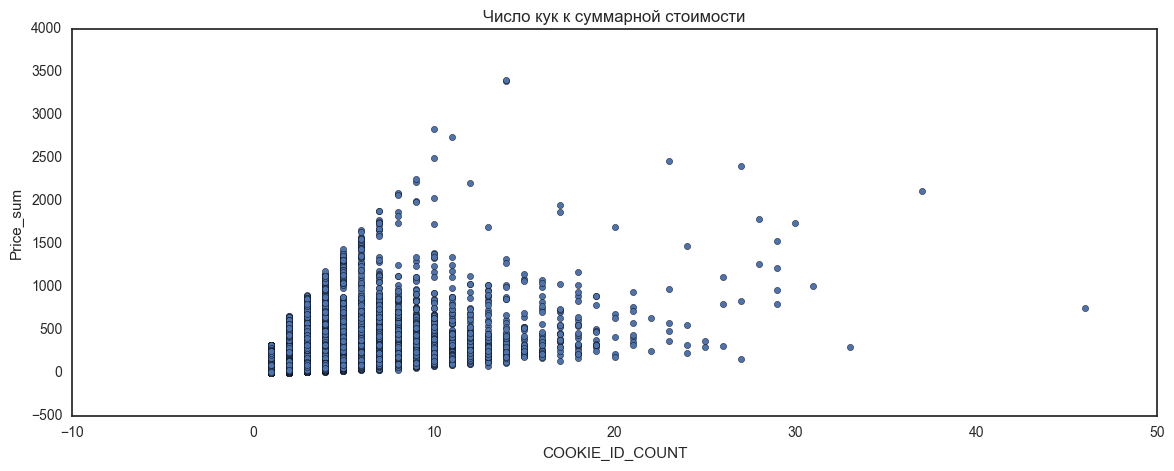

In [26]:
figsize(14, 5) 
cookies[['COOKIE_ID_COUNT', 'Price_sum']].plot(kind='scatter', x='COOKIE_ID_COUNT', y='Price_sum', title=u'Число кук к суммарной стоимости')

In [27]:
cookies  = cookies.replace(np.inf, np.nan).fillna(0)

In [28]:
cookies.describe()

,REC_COUNT,COOKIE_ID_COUNT,UNIQUE_SESSION_in_COOKIE_ID,TdiffTotal,TdiffMax,TdiffMin,TUnique,PUnique,Price_mean,Price_sum,Price_median,Price_by_time_diff,COOKIE_ID_COUNT_by_time_diff
count,62127.000000,62127.000000,62127.000000,6.212700e+04,6.212700e+04,6.212700e+04,6.212700e+04,62127.000000,62127.000000,62127.000000,62127.000000,62127.000000,62127.000000
mean,1.219164,1.908236,1.062421,3.836080e+04,1.453035e+04,-1.406208e+04,-1.406208e+04,1.895617,144.194811,201.686577,142.706030,6.805685,0.292345
std,0.423603,1.893079,0.279921,2.257502e+05,1.865636e+05,1.854507e+05,1.854507e+05,1.870024,112.357044,179.827484,113.922459,30.891011,1.294970
min,1.000000,1.000000,1.000000,0.000000e+00,-2.435173e+06,-2.465049e+06,-2.465049e+06,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,25.666667,49.000000,24.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,177.000000,214.000000,182.000000,0.000000,0.000000
75%,1.000000,2.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000,254.000000,270.000000,254.000000,0.000000,0.000000
max,4.000000,46.000000,9.000000,2.484340e+06,2.484339e+06,2.394588e+06,2.394588e+06,45.000000,331.000000,3407.000000,331.000000,641.000000,33.000000


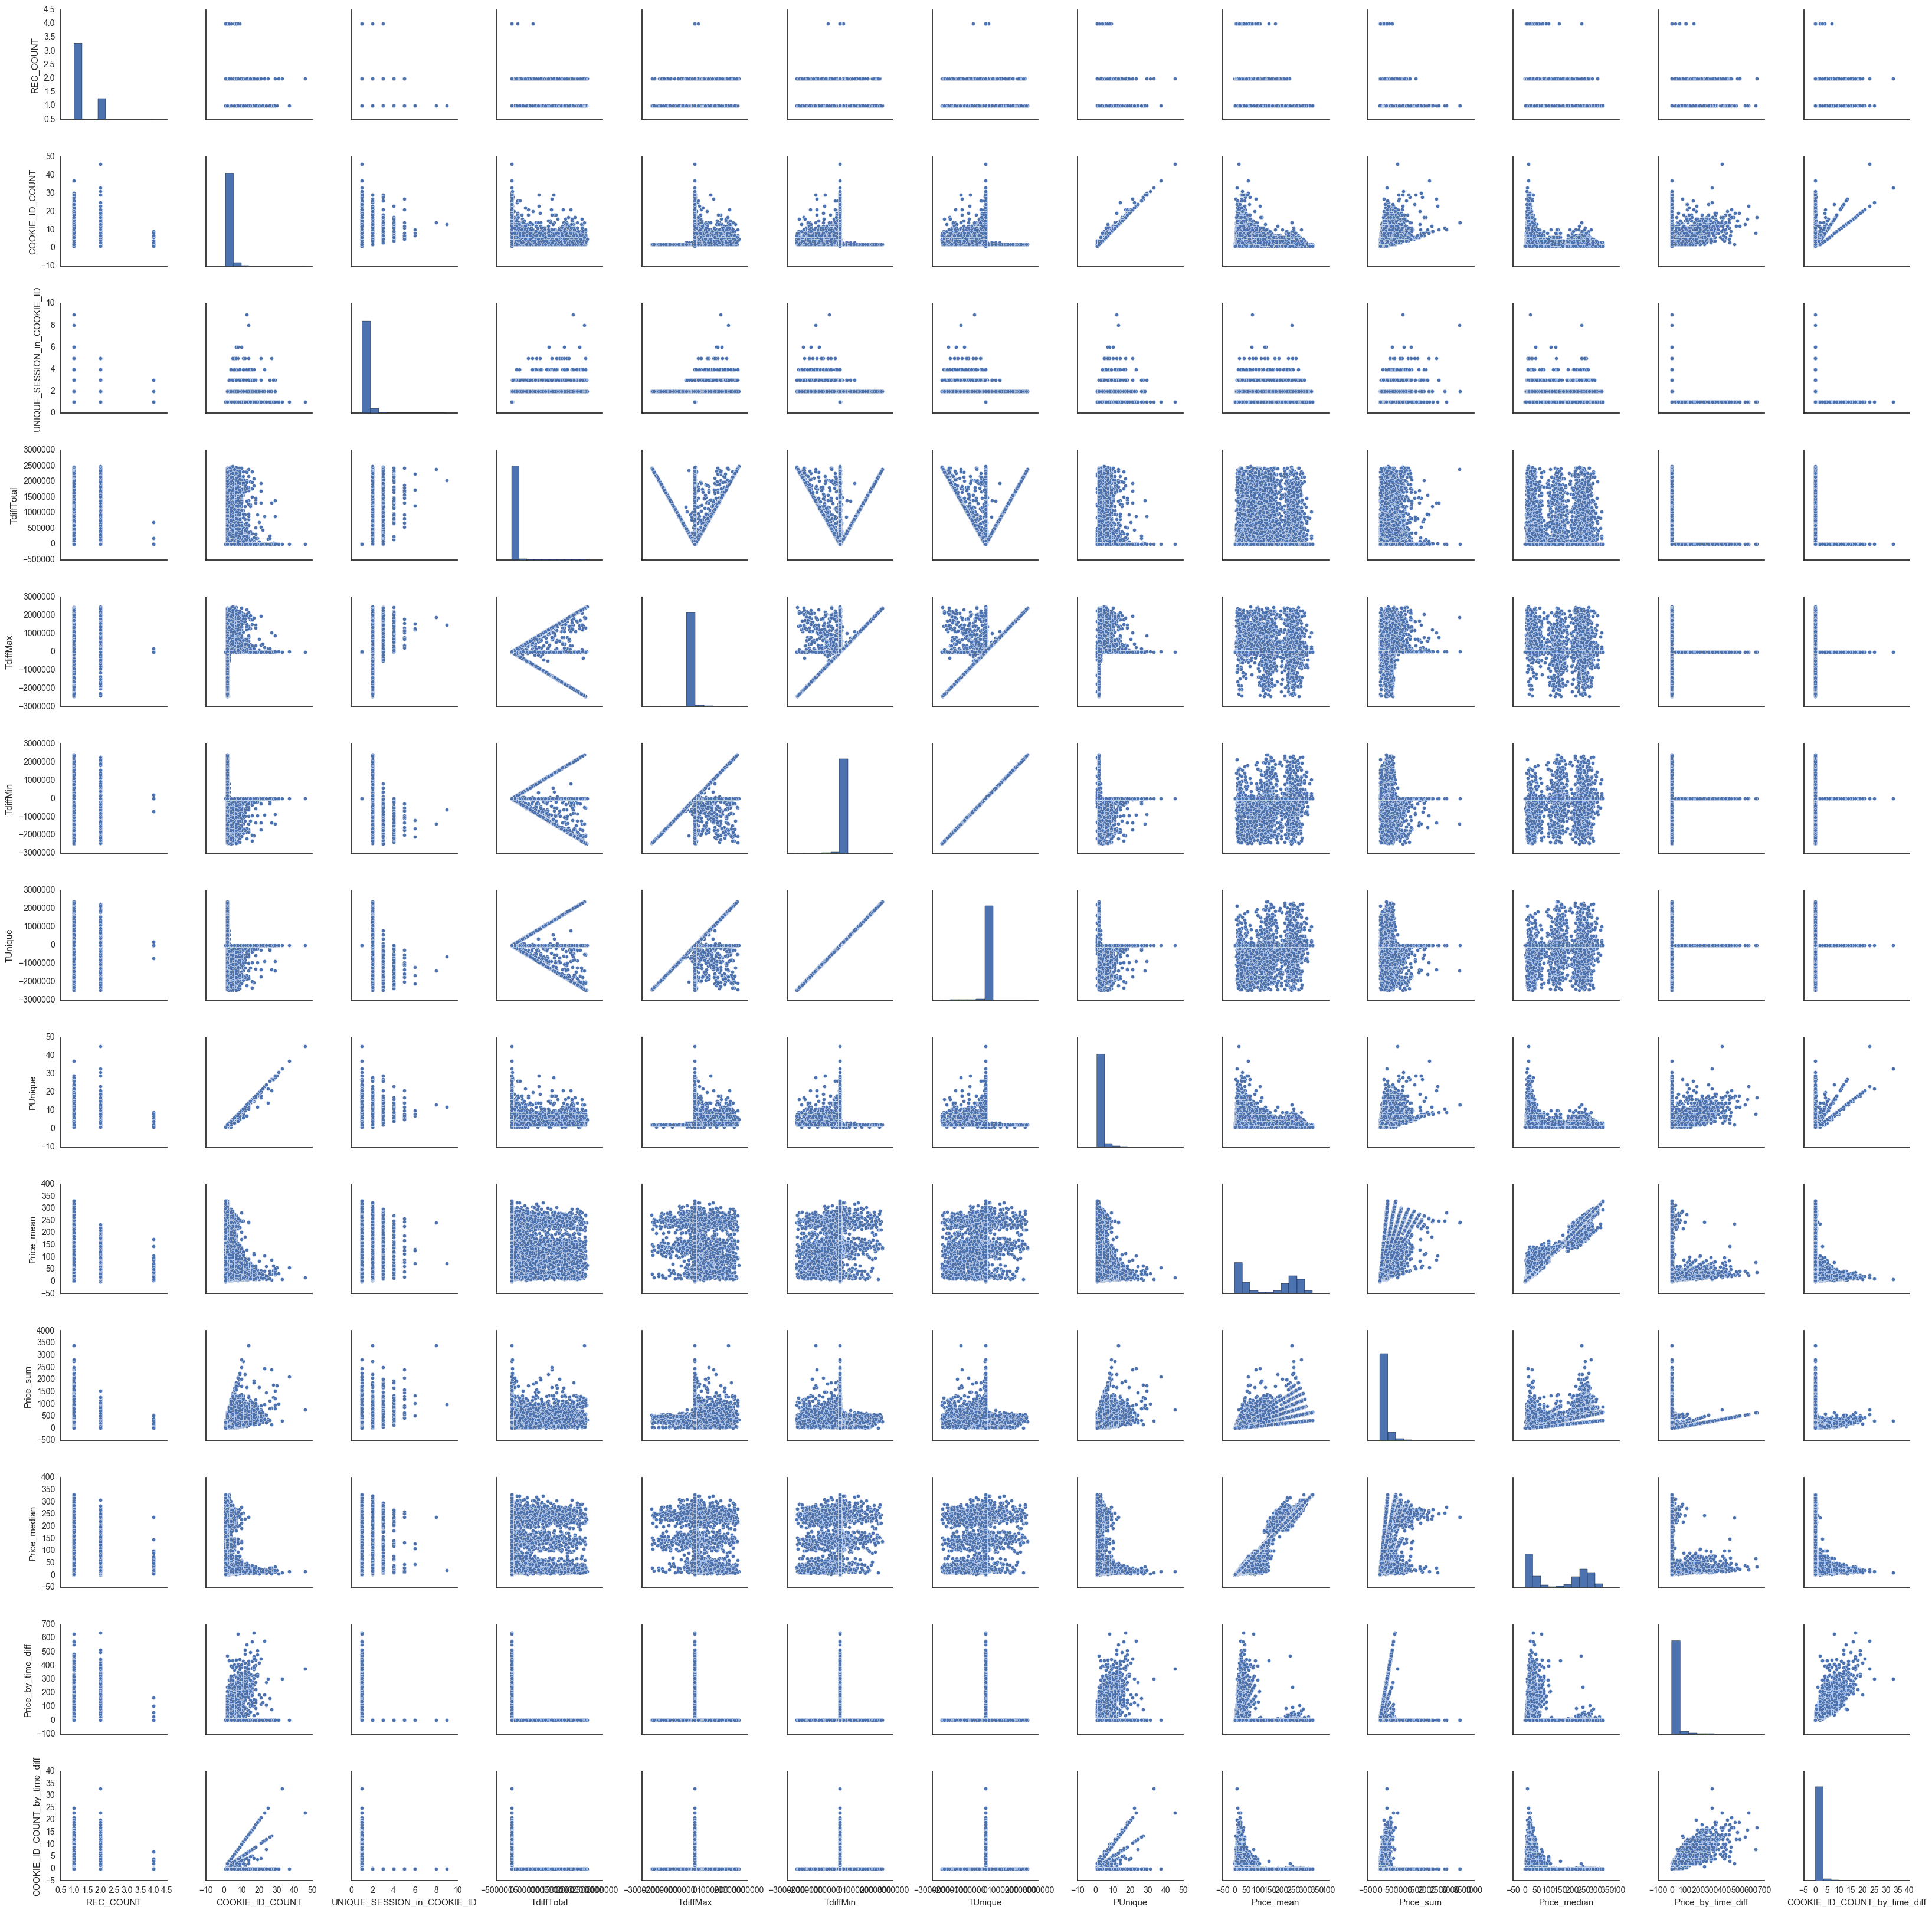

In [29]:
sns.pairplot(cookies[cookies.columns])

# Снижение размерности и поиск аномалий

In [30]:
from sklearn.preprocessing import scale
from sklearn import svm
from scipy import stats
from sklearn.decomposition import PCA


In [42]:
#шкалируем данные
X = scale(cookies) 

In [43]:
#снижаем размерность
pca = PCA(n_components=2)
X = pca.fit_transform(X)

In [44]:
df=pd.DataFrame(columns=('Ncomp', 'coeff', 'feat'))
n=1
for component in pca.components_:
#    print component
    for value, name in zip(component, cookies.columns):
        df.loc[len(df)]=[n,abs(value), name]
    n+=1    

In [45]:
df[df.coeff>0.3].sort_values(by=['Ncomp', 'coeff'], ascending=False)

,Ncomp,coeff,feat
16,2.0,0.413072,TdiffTotal
15,2.0,0.406700,UNIQUE_SESSION_in_COOKIE_ID
22,2.0,0.394040,Price_sum
18,2.0,0.383347,TdiffMin
19,2.0,0.383347,TUnique
1,1.0,0.419695,COOKIE_ID_COUNT
7,1.0,0.419305,PUnique
10,1.0,0.375176,Price_median
8,1.0,0.369354,Price_mean
12,1.0,0.335135,COOKIE_ID_COUNT_by_time_diff


Наиболее важные признакаи первой компоненты:
TdiffTotal
UNIQUE_SESSION_in_COOKIE_ID
Price_sum
TdiffMin
TUnique

Второй:
COOKIE_ID_COUNT
PUnique
Price_median
Price_mean
COOKIE_ID_COUNT_by_time_diff
Price_by_time_diff


## Попытаемся найти выбросы методом OneClassSVM

In [46]:
OUT_COUNT = 0.001 # предполагаемый процент выбросов

svm_clf = svm.OneClassSVM()
svm_clf.fit(X)

dist_to_border = svm_clf.decision_function(X).ravel()
threshold = stats.scoreatpercentile(dist_to_border,
            100 * OUT_COUNT)
is_outlier = dist_to_border < threshold

(-10, 35)

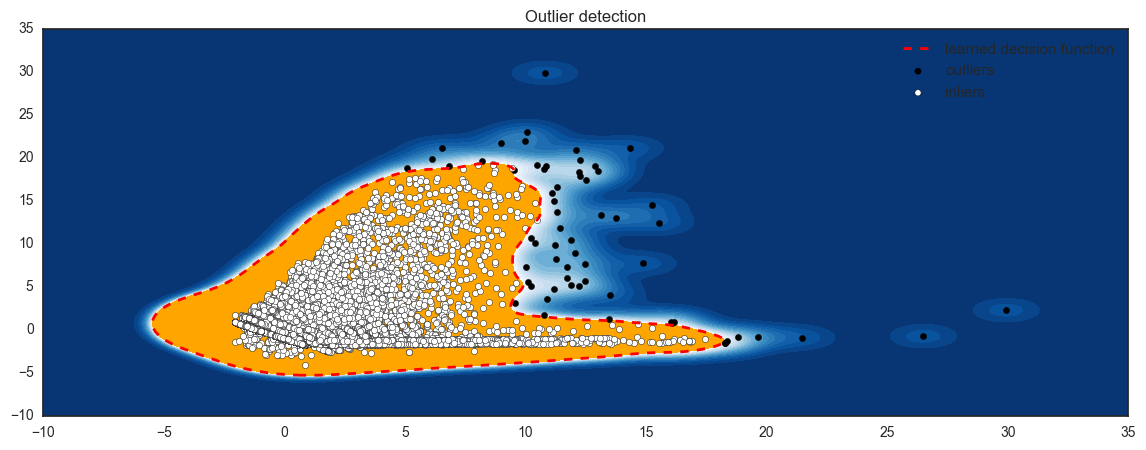

In [52]:
sess_count = cookies.shape[0]
xl=-10; yl=35
xx, yy = np.meshgrid(np.linspace(xl, yl, 500), np.linspace(xl, yl, 500))
n_inliers = int((1. - OUT_COUNT) * sess_count)
n_outliers = int(OUT_COUNT * sess_count)
Z = svm_clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.title("Outlier detection")
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), threshold, 20),
                         cmap=plt.cm.Blues_r)
a = plt.contour(xx, yy, Z, levels=[threshold],
                            linewidths=2, colors='red')
plt.contourf(xx, yy, Z, levels=[threshold, Z.max()],
                         colors='orange')
b = plt.scatter(X[is_outlier, 0], X[is_outlier, 1], c='black')
c = plt.scatter(X[is_outlier == 0, 0], X[is_outlier == 0, 1], c='white')
plt.axis('tight')
plt.legend([a.collections[0], b, c],
           ['learned decision function', 'outliers', 'inliers'],
           prop=matplotlib.font_manager.FontProperties(size=11))
plt.xlim((xl, yl))
plt.ylim((xl, yl))

# Сами найденные "выбросы"

In [49]:
print (np.shape(cookies[is_outlier])[0])
cookies[is_outlier].sample(10)

63


,REC_COUNT,COOKIE_ID_COUNT,UNIQUE_SESSION_in_COOKIE_ID,TdiffTotal,TdiffMax,TdiffMin,TUnique,PUnique,Price_mean,Price_sum,Price_median,Price_by_time_diff,COOKIE_ID_COUNT_by_time_diff
COOKIE_ID,,,,,,,,,,,,,
50011433847080182140453,1,3,3,2317429.0,100044.0,-2317429.0,-2317429.0,3.0,283.333333,850.0,291.0,0.000367,0.000001
30131443644753050955742,1,28,3,31145.0,26883.0,-16490.0,-16490.0,27.0,64.000000,1792.0,12.5,0.057537,0.000899
30031443357598301889597,2,7,4,2320423.0,2229726.0,-2320423.0,-2320423.0,6.0,53.857143,377.0,11.0,0.000162,0.000003
50081436461531070489269,1,8,6,2242517.0,1279290.0,-2097444.0,-2097444.0,8.0,128.750000,1030.0,128.5,0.000459,0.000004
30171448629386033887097,2,31,1,10457.0,5226.0,0.0,0.0,31.0,32.580645,1010.0,6.0,0.096586,0.002965
30061420632690284299751,2,7,5,2432937.0,1300060.0,-2005974.0,-2005974.0,7.0,170.000000,1190.0,239.0,0.000489,0.000003
30121358456996166739779,2,23,2,25185.0,1333.0,-25185.0,-25185.0,23.0,21.217391,488.0,14.0,0.019377,0.000913
30241446456037273599125,2,20,1,1.0,1.0,0.0,0.0,20.0,20.950000,419.0,23.0,419.000000,20.000000
50231445777871095573072,1,29,2,16184.0,15283.0,0.0,0.0,28.0,33.206897,963.0,12.0,0.059503,0.001792
